In [1]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=pd.errors.SettingWithCopyWarning)

###### Loading Dataset

In [2]:
aqi_day_data = pd.read_csv("day-wise-state-wise-air-quality-index-aqi-of-major-cities-and-towns-in-india.csv")
aqi_day_data.head(1)

,date,state,area,number_of_monitoring_stations,prominent_pollutants,aqi_value,air_quality_status,unit,note
0,19-06-2025,Uttar Pradesh,Agra,5.0,"O3,PM2.5,PM10",49.0,Good,number_of_monitoring_stations in Absolute Numb...,NaN


In [3]:
vehicle_data = pd.read_csv("master-data-state-vehicle-class-and-fuel-type-wise-total-number-of-vehicles-registered-in-each-month-in-india.csv")
vehicle_data.head(1)

,year,month,state,rto,vehicle_class,fuel,value,unit,note
0,2025,April,Andaman and Nicobar Islands,All Vahan Running Office,BUS,DIESEL,2,value in Absolute Number,NaN


In [4]:
disease_data = pd.read_csv("master-data-state-district-and-disease-wise-cases-and-death-reported-due-to-outbreak-of-diseases-as-per-weekly-reports-under-idsp.csv", 
                      encoding ="latin1")
disease_data.head(1)

,year,week,outbreak_starting_date,reporting_date,state,district,disease_illness_name,status,cases,deaths,unit,note
0,2025,14,05-04-2025,05-04-2025,Assam,Biswanath,Food Poisoning,Reported,18.0,0.0,"cases in absolute number, deaths in absolute n...",NaN


In [5]:
population_data = pd.read_excel("population-projection-of-india-state-and-gender-wise-yearly-projected-urban-population-2011-2036.xlsx")
population_data.head(1)

,year,month,state,gender,value,unit,note
0,2036,October,West Bengal,Total,43964,value in Thousands,NaN


## Data Cleaning

In [74]:
# replace the mis-spelled values, in-consistent values with correct one

disease_data = disease_data.replace('Reported late', 'Reported Late')

disease_data = disease_data.replace("Acute encephalitic syndrome", "Acute Encephalitic Syndrome")

disease_data = disease_data.replace(['Arunachal', 'Andhra Pradesh','Madhya','Uttar' ,'Himachal'],
                                    ['Arunachal Pradesh','Andhara','Madhya Pradesh','Uttar Pradesh','Himachal Pradesh'])

aqi_day_data = aqi_day_data.replace('Andhra Pradesh', 'Andhara')

In [7]:
aqi_day_data['date'] = pd.to_datetime(aqi_day_data['date'],format='%d-%m-%Y') # convert object datatype into datetime

aqi_day_data['month'] = aqi_day_data['date'].dt.month_name() # add month_name 

disease_data['reporting_date'] = pd.to_datetime(disease_data['reporting_date'], format = "%d-%m-%Y") # convert object into datetime

aqi_day_data['year'] = aqi_day_data['date'].dt.year # extract year from the year column

### 1. Average aqi value areas between december 2024 and may 2025

In [8]:
# filtered the dataset from december 2024 to may 2025 using between function
last_6_months = ( aqi_day_data[aqi_day_data["date"]
                 .between("1-12-2024", "31-5-2025")]
)

In [9]:
# group the data based on area by Avg.aqi_value and sort by descending 
area_avg_aqi = (
                last_6_months.groupby("area", as_index=False)["aqi_value"]
                .mean()
                .sort_values(by = "aqi_value",ascending=False)
)

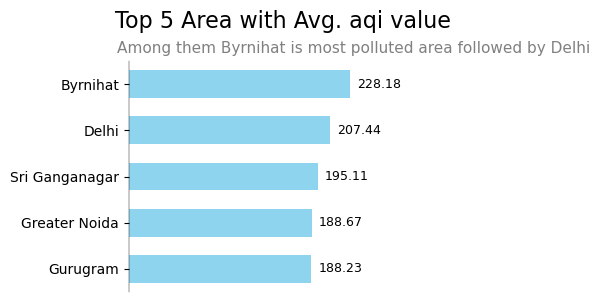

In [10]:
# Find: Top 5 Area with Average aqi value
fig, ax = plt.subplots(figsize = (3,3))
ax = sns.barplot(data = area_avg_aqi.head(5), x = "aqi_value", y = "area", width = 0.6, color = "#7FDBFF")

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', padding=5, color='black', fontsize=9)

plt.suptitle("Top 5 Area with Avg. aqi value", fontsize=16,  x = 0.08, ha = "left", y = 1.05) # Add Title
plt.title("Among them Byrnihat is most polluted area followed by Delhi", fontsize=11, color="gray", x = -0.05,ha = "left") # Add Sub-Title
ax.set_xticks([]) # Remove X-axis ticks 
ax.spines['left'].set_linewidth(0.3) # reduce the Horizontal Line 
ax.set(xlabel=None, ylabel=None) # Remove x-axis & y-axis label name
sns.despine(bottom= True)
plt.show()

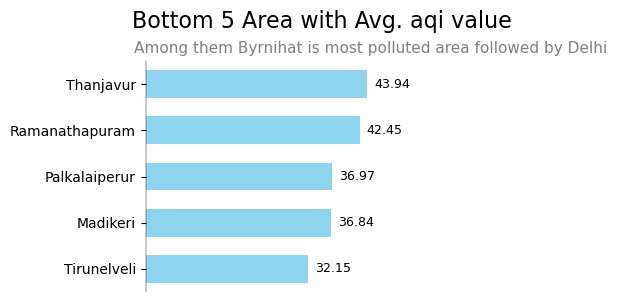

In [11]:
# Find: Top 5 Area with Average aqi value
fig, ax = plt.subplots(figsize = (3,3))
ax = sns.barplot(data = area_avg_aqi.tail(5), x = "aqi_value", y = "area", width = 0.6, color = "#7FDBFF")

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', padding=5, color='black', fontsize=9)

plt.suptitle("Bottom 5 Area with Avg. aqi value", fontsize=16,  x = 0.08, ha = "left", y = 1.05) # Add Title
plt.title("Among them Byrnihat is most polluted area followed by Delhi", fontsize=11, color="gray", x = -0.05,ha = "left") # Add Sub-Title
ax.set_xticks([]) # Remove X-axis ticks 
ax.spines['left'].set_linewidth(0.3) # reduce the Horizontal Line 
ax.set(xlabel=None, ylabel=None) # Remove x-axis & y-axis label name
sns.despine(bottom= True)
plt.show()

### Recommendation
Based on the data, these are highly polluted cities. So, we strongly recommend to start production and R&D based on these area.

### 2. List out top 2 and bottom 2 prominent pollutants for each state of southern India

In [12]:
# filters data where 2022 year onwards 
aqi_data = aqi_day_data.loc[ aqi_day_data['year'] >= 2022 ]

In [13]:
# filters the southeren states by using is-in function
south_states = ( aqi_data[aqi_data['state']
                .isin(['Karnataka', 'Tamil Nadu', 'Andhara','Kerala', 'Telangana'])]
)

In [14]:
# Groupby the state and prominent_pollutants columns respectively 
# and then sum by aqi_value sort by descending value
state_groupby = (
                south_states.groupby(['state','prominent_pollutants'])
                .agg({'aqi_value':'sum'})
                .sort_values(by = ['state','aqi_value'], ascending =[True, False])
                .reset_index()
)
state_grouped = state_groupby.groupby('state').head(2)

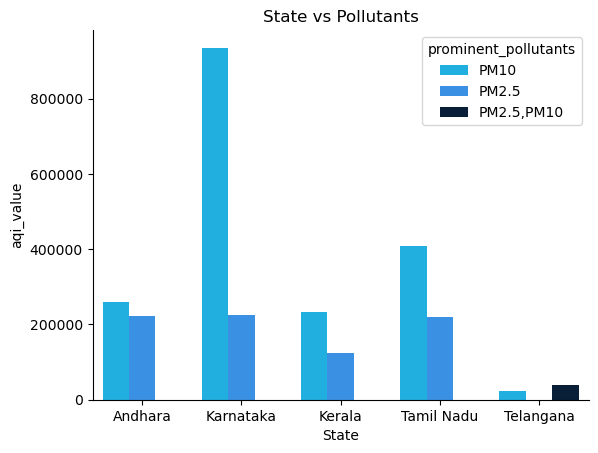

In [15]:
# plot a graph prominent pollutants along with states

ax, fig = plt.subplots()
colors = ["#00BFFF", "#1E90FF", "#001F3F"] # set color for bar chart
ax = sns.barplot(data = state_grouped, x = "state", y = "aqi_value", hue = "prominent_pollutants", palette = colors)
plt.title("State vs Pollutants") # Add title
plt.xlabel("State") # Add x-label name
sns.despine(bottom= False)
plt.show()

### Insights
From the data, in southern india most prominent pollutant is **PM10[Particulate Matter]**. So, **TRUE HEPA Filter** is most suitable for these fine particles  

### 5.bangalore group by with air quality category in march and may 2025

In [16]:
# filters data with bangalore city from day dataset
data_bangalore = aqi_day_data[aqi_day_data['area'] == 'Bengaluru']

In [17]:
# from bangalore city with certain period between march 2025 and may 2025
# using the between function

bangalore_period_time = ( data_bangalore[data_bangalore['date']
                         .between("1-3-2025","31-5-2025")]
)

In [18]:
# Groupby data by air quality status column and calculate total aqi value
bangalore_air_category = ( 
                        bangalore_period_time.groupby("air_quality_status")
                        .agg({'date' : 'count'})
)

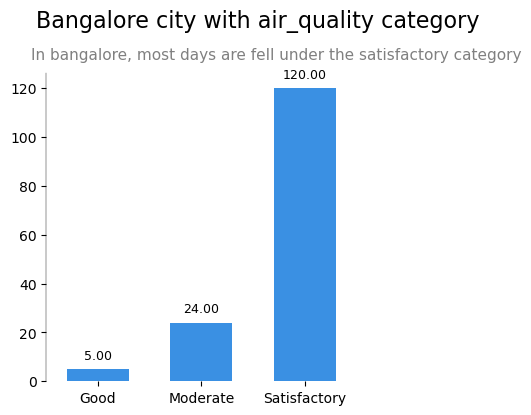

In [19]:
fig, ax = plt.subplots(figsize = (4,4))
ax = sns.barplot(data = bangalore_air_category, x = "air_quality_status", y = "date", width = 0.6, color = "#1E90FF")

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', padding=5, color='black', fontsize=9)

plt.suptitle("Bangalore city with air_quality category", fontsize=16,  x = 0.10, ha = "left", y = 1.04)
plt.title("In bangalore, most days are fell under the satisfactory category", fontsize=11, color="gray", x = -0.05, ha = "left", pad = 10)
ax.spines['left'].set_linewidth(0.3)
ax.set(xlabel=None, ylabel=None)
sns.despine(bottom= True)
plt.show()

## Insights
In bangalore, most of the days fell under **satisfactry category**. So, it affects people who have 
pre-existing respiratory condition like **lung or heart disease, children and elder people**.

###### 4. Which months consistently show the worst air quality across Indian states

In [20]:
# Map month names to month numbers
month_order = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
    'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12
}

aqi_day_data['month_order'] = aqi_day_data['month'].map(month_order)

In [21]:
# by using pivot table, by aggregating the mean value of aqi value with corresponds with state column 

pivot = pd.pivot_table(aqi_day_data, index = 'state', columns = 'month_order',  values = 'aqi_value', aggfunc = 'mean')

In [22]:
# to sort the month columns by descending order
pivot = pivot.sort_values(by = [1,2,3,4,5,6,7,8,9,10,11,12], ascending = False).head(10)

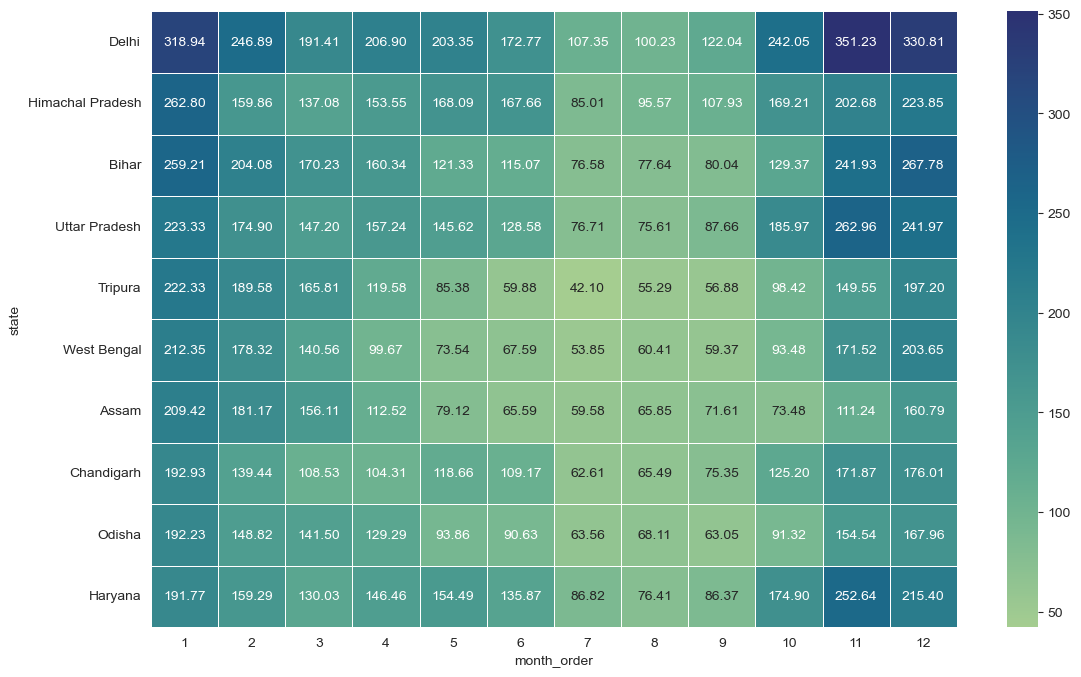

In [51]:
# Plot for AQI value across state with months
plt.figure(figsize = (13, 8))
sns.heatmap(pivot, cmap = "crest", annot = True, fmt = ".2f", linewidths = 0.5) # Heatmap
plt.ylabel = ('State') # Y -axis Title
plt.show()

### Insights 
From the visuals, it clearly shows that aqi values spiked at **winter seasons** [Nov, Dec, Jan, Feb] Months. 
So, **increasing production** and **run seasonal campaign** in high polluted cities.

### 6. List the top two most reported disease illnesses in each state over the past three years, along with the corresponding average Air Quality Index 
###    (AQI) for that period.


In [24]:
# filter dataset from year 2022 onwards
disease_data_2022 = disease_data.loc[disease_data["year"] >= 2022]

In [25]:
# group by the state column with aggregating mean value by aqi_value

aqi_2022_state = (
                aqi_data.groupby("state")
                .agg({"aqi_value" : "mean"})
)

In [26]:
# merge the two data-frame with outer join based on state column

aqi_disease_data = pd.merge( aqi_2022_state, disease_data_2022, 
                            how = "outer", on = "state" )

In [27]:
# group by the dataframe with state and disease_illness_name columns respectively
# by aggregating mean value and sort in by descending values based on aqi_value 

aqi_disease_data_grouped = (
                        aqi_disease_data.groupby(["state", "disease_illness_name"])
                        .agg({"aqi_value" : "mean"})
                        .sort_values(by = ['aqi_value'], ascending =False)
                        .reset_index()
)
aqi_disease_data_grouped = aqi_disease_data_grouped.groupby("state").head(2)

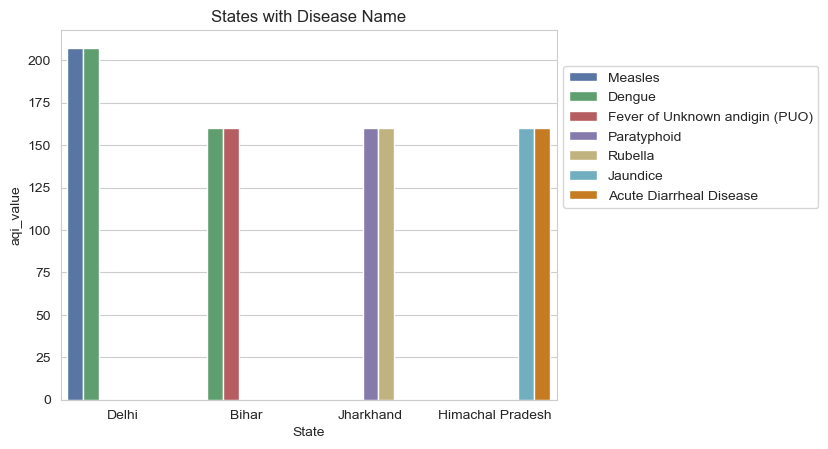

In [59]:
# plot a graph for prominent pollutants along with states

ax, fig = plt.subplots()
ax = sns.set_style("whitegrid") # set style for chart
colors = ["#4C72B0", "#55A868", "#C44E52", "#8172B2", "#CCB974", "#64B5CD", "#E17C05"] # color code for graph
ax = sns.barplot(data = aqi_disease_data_grouped.head(8), x = "state", y = "aqi_value", 
                 hue = "disease_illness_name", width = 0.9, palette = colors)
plt.title("States with Disease Name") # Add Title
plt.xlabel("State") # Add X-axis Title
ax.legend(loc = "lower left", bbox_to_anchor=(1, 0.5)) # place a legend box
plt.show()

### 3. Does AQI improve on weekends vs weekdays in Indian metro cities (Delhi, Mumbai, Chennai, Kolkata, Bengaluru, Hyderabad, Ahmedabad, Pune)?
### (Consider data from last 1 year)

In [63]:
# filters the data between june 2024 to june 2025
data_last_year = aqi_day_data[aqi_day_data["date"].between("1-06-2024","30-06-2025")]

In [64]:
# extracts weekday and weekend number from the date column
data_last_year["week"] = data_last_year["date"].dt.weekday

In [65]:
data_last_year.loc[:, 'weeks'] = None

In [33]:
def funcction(code): # write function to extract weekend and weekday
    # code range between 0 to 6 then weekday
    if code in range(0,5):
        return 'weekday'
    else: # else print weekend 
        return 'weekend'
        
# using apply function to apply to week column
data_last_year['weeks'] = data_last_year['week'].apply(funcction)

In [34]:
# selects specific city using isin function

data_metro = ( data_last_year[data_last_year['area']
              .isin(["Delhi","Mumbai","Chennai", "Kolkata","Bengaluru","Hyderabad","Ahmedabad","Pune"])]
)
# create a pivot table
data_weekend_weekday =  pd.pivot_table(data_metro, index = "area", columns = "weeks", values= "aqi_value", aggfunc = "sum")
data_weekend_weekday['weekday'] = data_weekend_weekday['weekday'] / 5 # find avg for weekdays
data_weekend_weekday['weekend'] = data_weekend_weekday['weekend'] / 2 # find avg for weekend

In [66]:
data_weekend_weekday_df = data_weekend_weekday.reset_index() # reset index 
df_melt = pd.melt( data_weekend_weekday_df, id_vars = ["area"], 
                  var_name = "weeks", value_name = "aqi_value" )

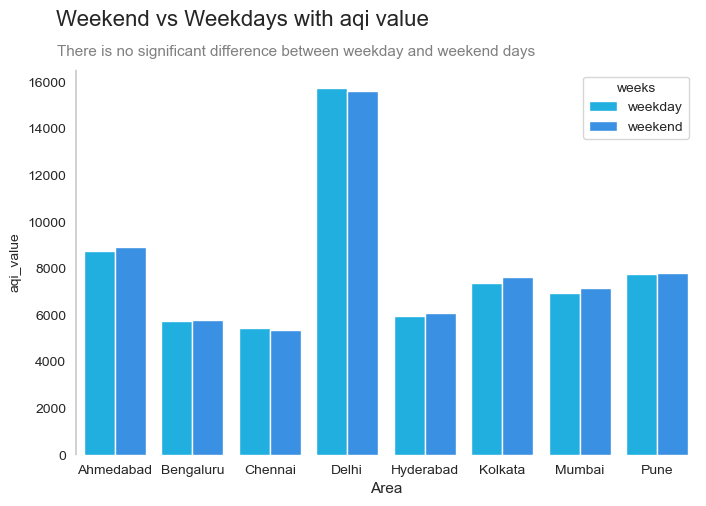

In [68]:
# plot a graph prominent pollutants along with states

fig, ax = plt.subplots(figsize = (8,5))
colors = ["#00BFFF", "#1E90FF"] # color code for bar chart
ax = sns.set_style("white") # set style for background
ax = sns.barplot(data = df_melt, x = "area", y = "aqi_value", hue = "weeks", width = 0.8, palette = colors)

plt.suptitle("Weekend vs Weekdays with aqi value", fontsize=16,  x = 0.10, ha = "left", y = 1.0) # Add Sub-title
plt.title("There is no significant difference between weekday and weekend days", 
          fontsize=11, color="gray", x = -0.03, ha = "left", pad = 10) # Add Title
plt.xlabel("Area", fontsize = 11) # Add x-axis
ax.spines["left"].set_linewidth(0.3) # Customize the y-axis line-width
sns.despine(bottom= True)
plt.show()

### Insights
<p style="font-size : 16px;">There is generally <b>no significant, consistent difference</b> in the air purifier market between weekdays and weekends because sales are primarily driven by <b>specific, events and long-term health</b> concerns rather than day-to-day variations in buying behavior</p>

### What is the relationship between a city’s population size and its average AQI — do larger
### cities always suffer from worse air quality? (Consider 2024 population and AQI data for this)


In [70]:
# filter city population data 
# where population year in 2024 and population is male and female

population_2024 = population_data[(population_data["gender"]=="Total") & (population_data["year"]==2024)]

In [71]:
# groupby state column and sums the value column

population_groupby = (
                    population_2024.groupby("state")
                    .agg({"value" : "sum"})
)
# drops the 'All India' column
population_groupby.drop(["All India"], inplace = True)

# find average - aqi for the year 2024
pop_2024 = aqi_day_data[aqi_day_data["year"] == 2024]

In [73]:
# groupby the state column and aggregation by average value for aqi_value column

pop_2024_grouped = (
                pop_2024.groupby("state")
                .agg({"aqi_value" : "mean"})
)
# combine the two dataframe using merge function
result = pd.merge(population_groupby, pop_2024_grouped, 
                  left_index=True, right_index=True)

# sort the aqi value column by using sort_values function
r = result.sort_values(by='value', ascending = False)

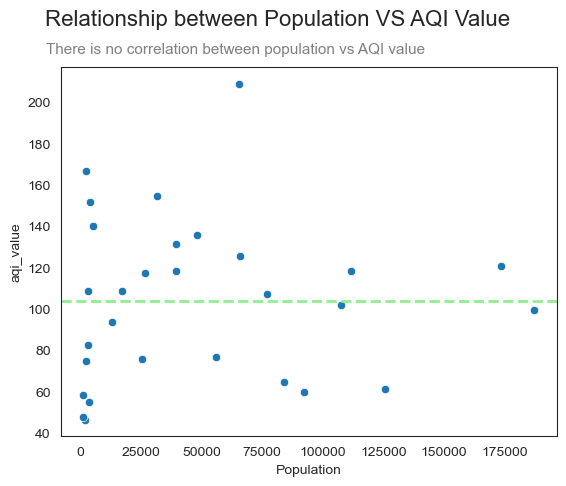

In [46]:
# plotting the scatter plot to find relationship b/w 
# population vs AQI 2024

sns.scatterplot(data = r, x = "value", y = "aqi_value")
sns.set_style("whitegrid") # set style
plt.suptitle("Relationship between Population VS AQI Value", fontsize=16,  x = 0.10, ha = "left",y = 1.0) # Add Subtitle
plt.title("There is no correlation between population vs AQI value", fontsize = 11, color = "gray", x = -0.03, ha = "left", pad = 10) # Add title

y_mean = r["aqi_value"].mean() # Find : Average value
plt.axhline(y = y_mean, color = "lightgreen", linestyle = "--", linewidth = 2)
plt.xlabel("Population")
plt.show()

In [47]:
r["value"].corr(r["aqi_value"]) # correlation between two variable

0.03780665519178934

### Insigts
Population shows no strong correlation with AQI levels. This indicates that air quality is driven more by pollution sources 
such as vehicles, industries, and weather conditions rather than the number of people living in a city.

# Overall Recommendation

## 1. Market Demand Insight

#### Insight:
Demand for air purifiers increases significantly during winter months, mainly due to higher pollution levels and stagnant air.
#### Recommendation:
should increase stock availability, run seasonal campaigns, and offer winter-specific bundles (extra HEPA filters, maintenance kits).

### 2. Filter Replacement Trend

#### Insight:
Filters, especially HEPA + Carbon, need replacement every 6–12 months, but many customers delay it due to cost.

#### Recommendation:
Introduce Razor-Blade model filter replacement plans and offer discounts for annual packages.

## 3. Market Prioritization

### Insight : 
Focus on Cities with high AQI levels (Byrnihat, Delhi, Noida, Gurugram ) with most hazaradous area. .

### Recommendation:
Target marketing and retail expansion in Tier-1 and Tier-2 polluted cities with location-based ads.